In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import factorial
from pyDOE import lhs
from functools import reduce
from scipy.misc import factorial as fac
plt.rcParams["figure.figsize"] = [9,5]

In [2]:
def g(x):
    return np.power(x,2)

In [ ]:
x = np.linspace(-3, 3, 200)
plt.plot(x, g(x))
plt.show()
mu = np.array([[-2, -1, -np.sqrt((1-6*0.1**2)/2), 0, np.sqrt((1-6*0.1**2)/2), 1, 2]])
X = mu + 0.1*np.random.randn(10000,7)
gX = g(X)
v = np.zeros(mu.size)
for i in np.arange(mu.size):
    v[i] = gX[:,i].var()

Simple optimization of a stochastic function

$ \min\limits_{\mu_X} \sigma^{2}_{G} $

where

$ X \sim N \left(\mu, \sigma \right) $  
$ \sigma > 0 $  
$ g\left(x\right) = x^2 $  
$ G = g\left(X\right) $

Solution:  
From the identity for variance
$$ E\left[X^2\right] = Var\left[X\right] + \left(E\left[X\right]\right)^{2} = \sigma^{2} + \mu^{2} $$

$$ \sigma_G^{2} = E\left[G^2\right] - \left(E\left[G\right]\right)^{2} = E\left[X^4\right] - \left(E\left[X^{2}\right]\right)^{2} $$

$E\left[X^{4}\right]$ is the known fourth moment of the non-standard normal distribution:

$$ \left(\mu ^{4}+6 \mu^{2}\sigma ^{2}+3\sigma ^{4}\right) - \left(\sigma^{2} + \mu^{2}\right)^{2} = 2 \left(2 \mu ^2 \sigma ^2+\sigma ^4\right)$$

Critical point when $ \dfrac{\partial \sigma^{2}_{G}}{\partial \mu} = 0 $

$$ \frac{\partial \sigma^{2}_{G}}{\partial \mu} = 8 \mu  \sigma ^2 = 0 \implies \mu = 0 $$

$$ \frac{\partial^{2} \sigma^{2}_{G}}{\partial \mu^{2}} = 8 \sigma ^2 > 0 $$

The second derivative test confirms that the critical point is a minimum. Therefore, the minimum variance is achieved when $\mu = 0$


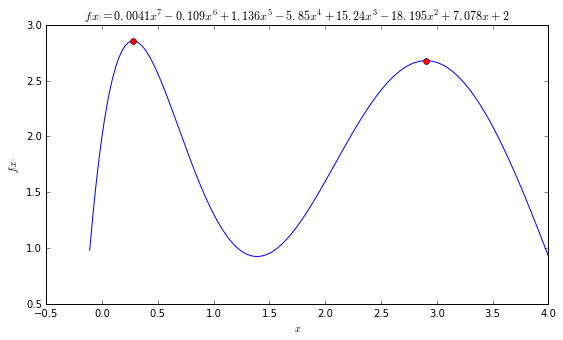

In [3]:
x = np.linspace(-0.11, 4, 220)
def g(x, mu, var):
    return 0.0041*x**7-0.109*x**6+1.136*x**5-5.85*x**4+15.24*x**3-18.195*x**2+7.078*x+2

plt.plot(x, g(x, 0, 0))
mux1 = 0.279
plt.plot(mux1, g(mux1,0,0), 'ro')
mux2 = 2.90
plt.plot(mux2, g(mux2,0,0), 'ro')
plt.title(r'$ f \left(x\right) = 0.0041 x^{7} - 0.109 x^{6} + 1.136 x ^{5} - 5.85 x^{4} + 15.24 x^{3} - 18.195 x^2+7.078 x+2 $')
plt.xlabel(r'$x$')
plt.ylabel(r'$f\left(x\right)$')

In [4]:
print("Calculating the roots of the derivative of the polynomial function to identifiy critical values")
p = [0.0041,-0.109,1.136,-5.85,15.24,-18.195,7.078,2]
pd = np.polyder(p)
np.roots(pd)

Calculating the roots of the derivative of the polynomial function to identifiy critical values


array([ 7.67607166+0.j        ,  5.26942928+0.85059046j,
        5.26942928-0.85059046j,  2.90398944+0.j        ,
        1.38895565+0.j        ,  0.27958113+0.j        ])

Consider the function

$ g\left(x\right) = 0.0041 x^{7} - 0.109 x^{6} + 1.136 x ^{5} - 5.85 x^{4} + 15.24 x^{3} - 18.195 x^2+7.078 x+2 $

whose graph, shown above for $ x \in \left[0,4\right] $, exhibits two local maxima at $ x \approx 0.279 $ and $ x \approx 2.90 $.  It's apparent from inspection of the graph that the peak at $ x \approx 0.279 $ has a higher curvature than the peak at $ x \approx 2.90 $.  One would expect then, that a normal random variable, $X$, with mean $ \mu $ and standard deviation 0.1 modified by the function, $g$, would exhibit a higher variance when $\mu=0.279$ than when $\mu=2.90$.

The below histograms confirm this suspicion.  The blue histogram results from passing 10000 samples of  $X \sim N\left(0.279, 0.1\right)$ through $g$ and the red histogram results from passing 10000 samples of $X \sim N\left(2.90, 0.1\right)$ through $g$. The peak value for the blue histogram is slightly higher, but it's tail is much heavier when compared to the red histogram.  This offers an excellent test function for which a trade-off can be made between a higher expected value and lower variation.

g(0.279) =  2.856
Mean of first histogram:   2.776
Variance of first histogram:   0.01482


g(2.90)  =  2.856
Mean of second histogram:   2.661
Variance of second histogram:   0.00058


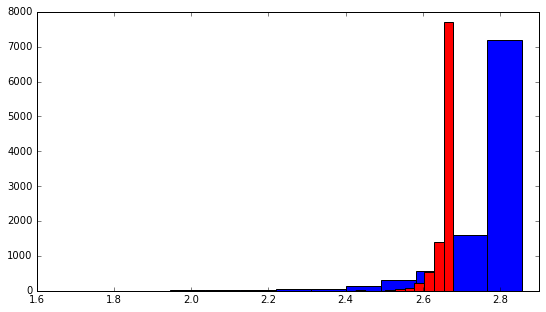

In [5]:
x1 = np.random.normal(mux1, 0.1, 10000)
gx1 = g(x1,0,0)
x2 = np.random.normal(mux2, 0.1, 10000)
gx2 = g(x2,0,0)
mugx1 = gx1.mean()
mugx2 = gx2.mean()
vargx1 = gx1.var()
vargx2 = gx2.var()
print(r'g(0.279) = ', np.round(g(mux1,0,0),3))
print(r'Mean of first histogram:  ', np.round(mugx1,3))
print(r'Variance of first histogram:  ', np.round(vargx1,5))
print('\n')
print(r'g(2.90)  = ', np.round(g(mux1,0,0),3))
print(r'Mean of second histogram:  ', np.round(mugx2,3))
print(r'Variance of second histogram:  ', np.round(vargx2,5))


fig, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.hist(gx1, bins=20, color = 'blue')
ax1.hist(gx2, bins=10, color='red')
ax1.set_xlim(1.6, 2.9)
plt.show()

### Inequality Constrained Stochastic Optimization

Consider the stochastic optimization problem

$ \max\limits_{\mu_X} \mu_G - 10 \sigma^{2}_{G} $

where

$ X \sim N \left(\mu_X, 0.1\right) $ whose PDF is $f_{X}\left(x ; \mu_X\right) = \frac{1}{\sqrt{0.2\pi}}e^{100\left(x-\mu_{X}\right)^{2}} $  
$ G = g\left(X\right) $  
$ g\left(x\right) = 0.0041 x^{7} - 0.109 x^{6} + 1.136 x ^{5} - 5.85 x^{4} + 15.24 x^{3} - 18.195 x^2+7.078 x+2 $  
$ 0 \lt \mu_X \lt 4$

The objective function simultaneously rewards high mean values and penalizes high variance values.  The weight factor on the variance has been chosen with the intent of ensuring that the right peak of the function will be the optimal choice.

A challenge of this type of formulation for generic $G$ is determining sensitivities of the statistical moments with respect to the design parameters.  This is further complicated by the fact that the design parameter in this case is a so-called 'inserted' design parameter that affects the CDF of the random variable [Dakota manual].  Since this particular $G$ is a polynomial, an analytical derivation of these sensitivities could be established in exactly the same manner as was done for the simpler case of $G\left(X\right) = X^2 $ by calculating the expecation and variance of the derivative, which, due to the linearity of the operations, are equivalent to the derivative of the expecation and variance.  However, with more generic forms of $G$ in mind, we'll instead construct a Polynomial Chaos Expansion of the function and use sensitivity formulations derived from the expansion to seek the optimal value [Section 9.2.1.1].

Since the $G$ is already a polynomial, it's expected that an eventual PCE should be of no higher order than the original function.  However, with the relatively low value of the coefficients on the $6^{th}$ and $7^{th}$ order terms, perhaps a 5th order PCE will be able to accurately predict the variance.

### Local Sensitivities w/r/t to Input Distribution Moments
[Stochastic sensitivity analysis by dimensional decomposition and score functions -- Sharif Rahman]

#### Sensitity of Output Expectation to Input Expectation
$ \mu_{G} = E\left[G\right] = E\left[g\left(X\right)\right] = \int_{-\infty}^{\infty}g\left(x\right)f_{X}\left(x;\mu_{X}\right) dx $  


$ \dfrac{\partial \mu_G}{\partial \mu_X} = \dfrac{\partial}{\partial \mu_X} \int_{-\infty}^{\infty}g\left(x\right)f_{X}\left(x;\mu_{X}\right) dx  = \int_{-\infty}^{\infty}g\left(x\right)\dfrac{\partial f_{X}}{\partial \mu_X} dx $<sup>1</sup>  


$ \int_{-\infty}^{\infty}g\left(x\right)\dfrac{\partial f_{X}}{\partial \mu_X} dx = \int_{-\infty}^{\infty}g\left(x\right)\dfrac{\partial \ln \left(f_{X}\right)}{\partial \mu_X} f_{X}dx =  \int_{-\infty}^{\infty}g\left(x\right) s_{\mu_X}^{\left(1\right)}\left(x, \mu_X \right) f_{X}dx = $  
$ E\left[g\left(x\right) s_{\mu_X}^{\left(1\right)}\left(x, \mu_X \right)\right]$

<sup>1</sup> Assuming regularity conditions in Rahman

#### Sensitity of Output Variance to Input Expectation
$ \sigma_G^2 = E\left[G^2\right] - \left(E\left[G\right]\right)^{2} = \int_{-\infty}^{\infty}\left[g\left(x\right)\right]^{2} f_{X}\left(x;\mu_{X}\right) dx - \left(\int_{-\infty}^{\infty} g\left(x\right) f_{X}\left(x;\mu_{X}\right) dx \right)^{2}$  
$ \dfrac{\partial \sigma_G^2}{\partial \mu_{X}} = \dfrac{\partial}{\partial \mu_{X}} \left(\int_{-\infty}^{\infty}\left[g\left(x\right)\right]^{2} f_{X} dx - \left(\int_{-\infty}^{\infty} g\left(x\right) f_{X} dx \right)^{2} \right) = \int_{-\infty}^{\infty}\left[g\left(x\right)\right]^{2} \dfrac{\partial f_{X}}{\partial \mu_{X}}  dx - 2 \left(\int_{-\infty}^{\infty} g\left(x\right) f_{X} dx \right) \left(\int_{-\infty}^{\infty} g\left(x\right) \dfrac{\partial f_{X}}{\partial \mu_{X}} dx \right) = $  
$ E\left[\left[g\left(x\right)\right]^{2} s_{\mu_{X}}^{\left(1\right)}\right] - 2 E\left[g\left(x\right)\right]E\left[g\left(x\right) s_{\mu_{X}}^{\left(1\right)}\right]$

In order to calculate sensitivities, we need to construct 2 additional PCE's for $ \left[g\left(x\right)\right]^{2} s_{\mu_{X}}^{\left(1\right)}$ and $ g\left(x\right) s_{\mu_{X}}^{\left(1\right)}$.  These expansions are both based on the same probability density function and can be expanded in the same basis functions and evaluated at the same points as the PCE for $G$ allowing for the same $\Psi$ matrix to be used for calculating the coefficients for each expansion.  The system to solve therefore becomes

$\begin{pmatrix}
\Psi_{0}\left(\xi_0\right) & \Psi_{2}\left(\xi_0\right) & \dots & \Psi_{P}\left(\xi_0\right) \\
\Psi_{0}\left(\xi_1\right) & \Psi_{2}\left(\xi_1\right) & \dots & \Psi_{P}\left(\xi_1\right) \\
\vdots & \vdots & \ddots & \vdots \\
\Psi_{0}\left(\xi_P\right) & \Psi_{2}\left(\xi_P\right) & \dots & \Psi_{P}\left(\xi_P\right)
\end{pmatrix}
\begin{pmatrix}
\alpha_{g,0} & \alpha_{gs,0} & \alpha_{g^{2}s,0} \\
\alpha_{g,1} & \alpha_{gs,1} & \alpha_{g^{2}s,1} \\
\vdots & \vdots & \vdots \\
\alpha_{g,P} & \alpha_{gs,P} & \alpha_{g^{2}s,P}
\end{pmatrix}=
\begin{pmatrix}
g\left(x_{1} \right) & g\left(x_{1}\right) s\left(x_{1}, \mu_X \right) & \left[g\left(x_{1}\right)\right]^{2} s\left(x_{1}, \mu_X \right)\\
g\left(x_{2}\right) & g\left(x_{2}\right) s\left(x_{2}, \mu_X \right) & \left[g\left(x_{2}\right)\right]^{2} s\left(x_{2}, \mu_X \right)\\
\vdots & \vdots & \vdots \\
g\left(x_{P}\right) & g\left(x_{P}\right) s\left(x_{P}, \mu_X \right) & \left[g\left(x_{P}\right)\right]^{2} s\left(x_{P}, \mu_X \right)
\end{pmatrix}
$



From these additional PCE coefficients, the expected values are easily calculated in terms of the first coefficient in the expansion:

$ \dfrac{\partial \mu_G}{\partial \mu_X} = E\left[g\left(x\right) s_{\mu_X}^{\left(1\right)}\left(x, \mu_X \right)\right] \approx E\left[\sum_{i=0}^{P} \alpha_{gs,i} \Psi_i\left(\xi\right)\right] = \alpha_{gs,0} $

$ \dfrac{\partial \sigma_G^2}{\partial \mu_{X}} = E\left[\left[g\left(x\right)\right]^{2} s_{\mu_{X}}^{\left(1\right)}\right] - 2 E\left[g\left(x\right)\right]E\left[g\left(x\right) s_{\mu_{X}}^{\left(1\right)}\right] \approx  E\left[\sum_{i=0}^{P} \alpha_{g^{2}s,i} \Psi_i\left(\xi\right) \right] - 2 E\left[\sum_{i=0}^{P} \alpha_{g,i} \Psi_i\left(\xi\right)\right]E\left[\sum_{i=0}^{P} \alpha_{gs,i} \Psi_i\left(\xi\right)\right] = \alpha_{g^{2}s,0} - 2 \alpha_{g,0}\alpha_{gs,0} $

In [6]:
# Polynomial Chaos Method
def get_polynomials(poly_type):
    if poly_type == 'Legendre' or poly_type == 'Le':
        # Legendre Orthgonal Polynomials
        # Use as basis for uniform distribution
        # weight function, w(x)=1/2, support=[-1,1]
        p0 = lambda x: np.ones(x.shape)
        p1 = lambda x: np.array(x)
        p2 = lambda x: 0.5*(3.0*(np.power(x,2)) - 1.)
        p3 = lambda x: 0.5*(5.0*(np.power(x,3)) - 3.0*x)
        p4 = lambda x: 0.125*(35.0*(np.power(x,4)) - 30.0*(np.power(x,2)) + 3.0)
        p5 = lambda x: 0.125*(63.0*(np.power(x,5)) - 70.0*(np.power(x,3)) + 15.0*x)
        p6 = lambda x: 0.0625*(231.0*(np.power(x,6)) - 315*(np.power(x,4)) + 105*(np.power(x,2)) - 5.0)
        p7 = lambda x: 0.0625*(429.0*(np.power(x,7)) - 693.0*(np.power(x,5)) + 315.0*(np.power(x,3)) - 35.0*x)
        p8 = lambda x: (1/128.)*(6435.0*(np.power(x,8)) - 12012.0*(np.power(x,6)) + 6930.0*(np.power(x,4)) - 1260.0*(np.power(x,2)) + 35.0)
        p9 = lambda x: (1/128.)*(12155.0*(np.power(x,9)) - 25740.0*(np.power(x,7)) + 18018.0*(np.power(x,5)) - 4620.0*(np.power(x,3)) + 315.0*x)  
    elif poly_type == 'LeN':
        # Normalized Legendre Orthgonal Polynomials
        # Use as basis for uniform distribution
        # weight function, w(x)=1/2
        # support=[-1,1]
        p0 = lambda x: np.ones(x.shape)
        p1 = lambda x: (np.sqrt(3))*np.array(x)
        p2 = lambda x: (np.sqrt(5))*0.5*(3.0*(np.power(x,2)) - 1.)
        p3 = lambda x: (np.sqrt(7))*0.5*(5.0*(np.power(x,3)) - 3.0*x)
        p4 = lambda x: (np.sqrt(9))*0.125*(35.0*(np.power(x,4)) - 30.0*(np.power(x,2)) + 3.0)
        p5 = lambda x: (np.sqrt(11))*0.125*(63.0*(np.power(x,5)) - 70.0*(np.power(x,3)) + 15.0*x)
        p6 = lambda x: (np.sqrt(13))*0.0625*(231.0*(np.power(x,6)) - 315*(np.power(x,4)) + 105*(np.power(x,2)) - 5.0)
        p7 = lambda x: (np.sqrt(15))*0.0625*(429.0*(np.power(x,7)) - 693.0*(np.power(x,5)) + 315.0*(np.power(x,3)) - 35.0*x)
        p8 = lambda x: (np.sqrt(17))*(1/128.)*(6435.0*(np.power(x,8)) - 12012.0*(np.power(x,6)) + 6930.0*(np.power(x,4)) - 1260.0*(np.power(x,2)) + 35.0)
        p9 = lambda x: (np.sqrt(19))*(1/128.)*(12155.0*(np.power(x,9)) - 25740.0*(np.power(x,7)) + 18018.0*(np.power(x,5)) - 4620.0*(np.power(x,3)) + 315.0*x)        
    elif poly_type == 'Hermite' or poly_type == 'He':
        # Hermite Orthgonal Polynomials
        # Use as basis for Normal random variable inputs
        p0 = lambda x: np.ones(x.shape)
        p1 = lambda x: np.array(x)
        p2 = lambda x: np.power(x,2) - 1.
        p3 = lambda x: np.power(x,3) - 3.0*x
        p4 = lambda x: np.power(x,4) - 6*np.power(x,2) + 3.0
        p5 = lambda x: np.power(x,5) - 10.0*np.power(x,3) + 15.0*x
        p6 = lambda x: np.power(x,6) - 15.0*np.power(x,4) + 45.0*np.power(x,2) - 15.
        p7 = lambda x: np.power(x,7) - 21.0*np.power(x,5) + 105*(np.power(x,3)) - 105.0*x
        p8 = lambda x: np.power(x,8) - 28.0*np.power(x,6) + 210.0*np.power(x,4) - 420.0*np.power(x,2) + 105
        p9 = lambda x: np.power(x,9) - 36.0*np.power(x,7) + 378.0*np.power(x,5) - 1260*np.power(x,3) + 945.0*x
    elif poly_type == 'HeN':
        # Normalized Hermite Orthgonal Polynomials
        # Use as basis for Normal random variable inputs
        p0 = lambda x: np.ones(x.shape)
        p1 = lambda x: np.array(x)
        p2 = lambda x: np.sqrt(1/2)*(np.power(x,2) - 1.)
        p3 = lambda x: np.sqrt(1/6)*(np.power(x,3) - 3.0*x)
        p4 = lambda x: np.sqrt(1/24)*(np.power(x,4) - 6*np.power(x,2) + 3.0)
        p5 = lambda x: np.sqrt(1/120)*(np.power(x,5) - 10.0*np.power(x,3) + 15.0*x)
        p6 = lambda x: np.sqrt(1/720)*(np.power(x,6) - 15.0*np.power(x,4) + 45.0*np.power(x,2) - 15.)
        p7 = lambda x: np.sqrt(1/5040)*(np.power(x,7) - 21.0*np.power(x,5) + 105.0*(np.power(x,3)) - 105.0*x)
        p8 = lambda x: np.sqrt(1/40320)*(np.power(x,8) - 28.0*np.power(x,6) + 210.0*np.power(x,4) - 420.0*np.power(x,2) + 105)
        p9 = lambda x: np.sqrt(1/362880)*(np.power(x,9) - 36.0*np.power(x,7) + 378.0*np.power(x,5) - 1260*np.power(x,3) + 945.0*x)   
    elif poly_type == 'Laguerre' or poly_type == 'La':
        # Laguerre Orthogonal Polynomials
        # Use as basis for Exponential distributed random variables
        p0 = None
    elif type(poly_type) == list:
        # Some logic that reads a list and generates an appropriate mix of polynomials.
        p0 = None
    else:
        p0 = None
    if p0 is not None:
        poly_list = [p0, p1, p2, p3, p4, p5, p6, p7, p8, p9]    
    else:
        poly_list = None
        
    return poly_list


def make_Psi_mat(xs, max_order, poly_type='Legendre'):
    """
    Given a random sample, xs, and a maximum polynomial order, max_order, return the 
    the combination of polynomial whose product is lower order than max_order.  poly_type
    defines the basis functions to use.
    """
    n = xs.shape[1]
    r = xs.shape[0]
    poly_list = get_polynomials(poly_type)
    assert (poly_list is not None), 'Polynomial type not currently supported'

    Psi_mat = np.stack([poly_list[i](xs.T) 
                        for i in np.arange(0, (max_order+1))]).swapaxes(0,2)
    p = max_order + 1
    ps = [np.arange(p) for i in np.arange(n)]
    grids = np.meshgrid(*ps)
    grids = [grid.flatten() for grid in grids]
    grids = np.vstack(grids)
    idx = np.argsort(grids.sum(axis=0))
    grids = grids[:, idx]
    idx = grids.sum(axis=0) <= max_order
    grids = grids[:, idx].T
    idx = grids + (p)*np.arange(n)

    Psi_mat = Psi_mat.reshape(-1, p*n)
    Psi_mat = Psi_mat[:, idx].prod(axis=2)
    return Psi_mat

def get_stats_normal(func, n, p, Np, mu, sig, poly_type="Hermite"):
    # Calculate Min number of realizations to solve for PC coefficients
    Nt = factorial(n+p)/(factorial(n)*factorial(p))
    # Generate Latin Hypercube Sample between -1 and 1
    sample = 12*(lhs(n, samples=int(Np*Nt))-0.5)
    # Calculate Psi matrix for Sample
    Psi_mat = make_Psi_mat(sample, p, poly_type=poly_type)
    transformed_sample = mu + sig*sample
    assert Np >= 1, "Oversampling Factor must be greater than or equal to 1"

    if Np == 1:
        alphas = np.linalg.solve(Psi_mat, func(transformed_sample, mu, sig**2)).flatten()
    elif Np > 1:
        alphas = np.linalg.solve(np.dot(Psi_mat.T, Psi_mat),
                                 np.dot(Psi_mat.T, func(transformed_sample, mu, sig**2))).flatten()

    sample = np.random.normal(size=(100000, n))
    Psi_mat = make_Psi_mat(sample, p, poly_type=poly_type)
    result = (alphas*Psi_mat).sum(axis=1)
    mu = alphas[0]*Psi_mat.flatten()[0]
    var = (np.square(alphas))[1::]
    var = var.sum()
    return result, mu, var, alphas

[ 2.45991078  2.65934491  2.66149143  2.66150295  2.66150295]
2.66150146731


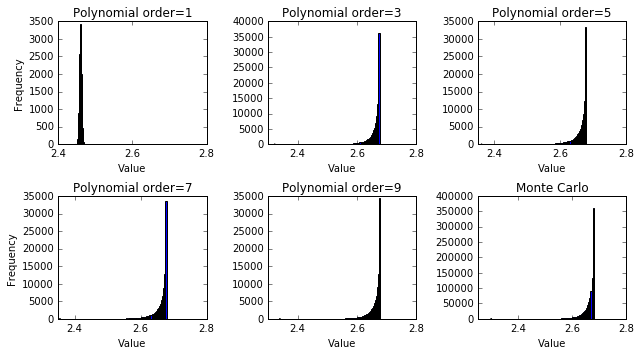

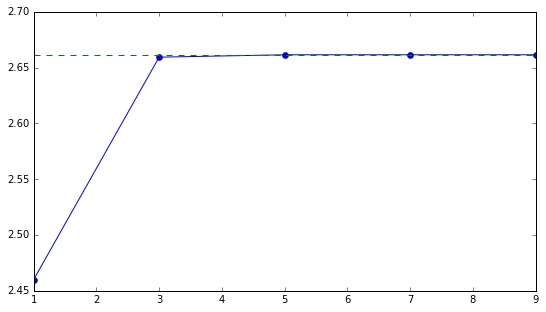

0.000576960981264
[  8.91195259e-06   5.20169684e-04   5.76687259e-04   5.77281535e-04
   5.77281535e-04]


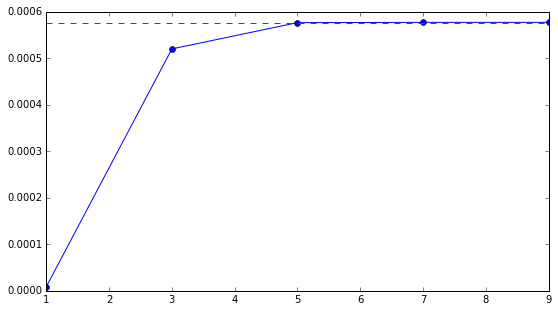

In [7]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
ax = [ax1, ax2, ax3, ax4, ax5]
mus = [None]*len(ax)
sigs = [None]*len(ax)
alpha = [None]*len(ax)
ps = [None]*len(ax)
mu_pce = 2.9
sig_pce = 0.1
ii = [None]*len(ax)
for p in np.arange(10):
    if p % 2 != 0:
        result, mu, var, alphas = get_stats_normal(func=g, n=1, p=p, Np=2, mu=mu_pce, sig=sig_pce, poly_type="HeN")
        i = int(np.floor(p/2) + 1)-1
        mus[i] = mu
        sigs[i] = var
        alpha[i]= alphas
        ps[i] = p
        ax[i].set_title('Polynomial order={}'.format(p))
        ax[i].hist(result, bins=100)#, range=(-2, 2))
        ax[i].set_xticks(np.linspace(2.4, 2.8, 3))
        ax[i].set_xlabel('Value')
        ii[i] = p

ax[0].set_ylabel('Frequency')
ax[3].set_ylabel('Frequency')

x2 = np.random.normal(mu_pce, sig_pce, 1000000)
gx2 = g(x2,0,0)

ax6.hist(gx2, bins=100)#, range=(-2,2))
ax6.set_title('Monte Carlo')
ax6.set_xlabel('Value')
ax6.set_xticks(np.linspace(2.4,2.8,3))

plt.tight_layout()

mc_g_mean = gx2.mean()
print(np.array(mus))
print(mc_g_mean)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(np.array(ps), np.array(mus), '-o')
ax.plot([1, 9], [mc_g_mean, mc_g_mean], '--')
plt.show()

mc_g_var = gx2.var()
print(mc_g_var)
print(np.array(sigs))
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(np.array(ps), np.array(sigs), '-o')
ax.plot([1, 9], [mc_g_var, mc_g_var], '--')
plt.show()

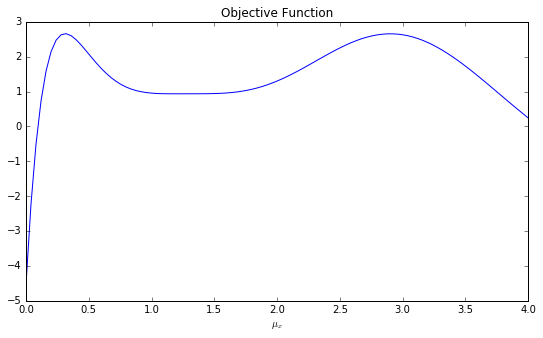

In [8]:
mux = np.linspace(0, 4, 101)
def obj(mu_x):
    p=7
    _, mu_g, var_g, _ = get_stats_normal(func=g, n=1, p=p, Np=2, mu=mu_x, sig=0.1, poly_type="HeN")
    return mu_g - 10*var_g

o = np.zeros(len(mux))
for i in range(len(mux)):
    o[i] = obj(mux[i])
    
plt.plot(mux, o)
plt.title('Objective Function')
plt.xlabel('$\mu_{x}$')

In [9]:
def score(x, mu, var):
    return (1/var)*(x - mu)

def gs(x, mu, var):
    return g(x, mu, var)*score(x, mu, var)

def g2s(x, mu, var):
    return (g(x, mu, var)**2)*score(x, mu, var)    


# Initial Mean and Constant Variance
mu_X0 = 1.4 # Initial Mean
def pce_ls(mu_X0, sig_01=0.1, alpha=0.1):
    # Generate PCE for G, Gs, and (G^2)s
    p=7
    _, mu_g, var_g, _ = get_stats_normal(func=g, n=1, p=p, Np=2, mu=mu_X0, sig=sig_01, poly_type="HeN")
    _, mu_gs, var_gs, _ = get_stats_normal(func=gs, n=1, p=p, Np=2, mu=mu_X0, sig=sig_01, poly_type="HeN")
    _, mu_g2s, var_g2s, _ = get_stats_normal(func=g2s, n=1, p=p, Np=2, mu=mu_X0, sig=sig_01, poly_type="HeN")
    df = mu_gs - 10*(mu_g2s - 2*mu_gs*mu_g)
    return mu_X0 + alpha*df

print(mu_X0)
iterations = 35
for i in range(iterations):
    mu_X0 = pce_ls(mu_X0)
    print(mu_X0)

1.4
1.40663840901
1.41330234722
1.42162539284
1.42969498998
1.43592451535
1.44402552962
1.4540329854
1.46563358132
1.47499036307
1.48578600477
1.49940683769
1.51109079408
1.52776072586
1.54537778186
1.56398035195
1.58661732911
1.61295555488
1.64465834434
1.68541246155
1.73450169723
1.79934118409
1.88297034424
1.99508452753
2.14398715095
2.33064155385
2.53359376417
2.70283364926
2.80785172296
2.86018682111
2.88406500533
2.89461769821
2.89926564373
2.90125380334
2.90210864204
2.9024592922


In [ ]:
len(mux)

g(0.279) =  2.856
Mean of first histogram:   2.775
Variance of first histogram:   0.01517
Objective Function:   2.62328018907


g(2.90)  =  2.679
Mean of second histogram:   2.662
Variance of second histogram:   0.00056
Objective Function:   2.65627624888


g(2.902)  =  2.679
Mean of second histogram:   2.661
Variance of second histogram:   0.00058
Objective Function:   2.65532829442


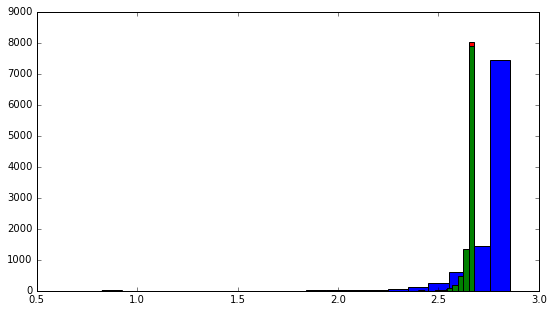

In [10]:
x1 = np.random.normal(mux1, 0.1, 10000)
gx1 = g(x1,0,0)
x2 = np.random.normal(mux2, 0.1, 10000)
gx2 = g(x2,0,0)
mux3 = mu_X0
x3 = np.random.normal(mux3, 0.1, 10000)
gx3 = g(x3,0,0)
mugx1 = gx1.mean()
mugx2 = gx2.mean()
mugx3 = gx3.mean()
vargx1 = gx1.var()
vargx2 = gx2.var()
vargx3 = gx3.var()

print(r'g(0.279) = ', np.round(g(mux1,0,0),3))
print(r'Mean of first histogram:  ', np.round(mugx1,3))
print(r'Variance of first histogram:  ', np.round(vargx1,5))
print(r'Objective Function:  ', mugx1 - 10*vargx1)
print('\n')
print(r'g(2.90)  = ', np.round(g(mux2,0,0),3))
print(r'Mean of second histogram:  ', np.round(mugx2,3))
print(r'Variance of second histogram:  ', np.round(vargx2,5))
print(r'Objective Function:  ', mugx2 - 10*vargx2)
print('\n')
print(r'g({})  = '.format(str(np.round(mu_X0,3))), np.round(g(mux3,0,0),3))
print(r'Mean of second histogram:  ', np.round(mugx3,3))
print(r'Variance of second histogram:  ', np.round(vargx3,5))
print(r'Objective Function:  ', mugx3 - 10*vargx3)

fig, ax1 = plt.subplots(nrows=1, ncols=1)
ax1.hist(gx1, bins=20, color = 'blue')
ax1.hist(gx2, bins=10, color='red')
ax1.hist(gx3, bins=10, color='green')
# ax1.set_xlim(1.6, 2.9)
plt.show()

Simple Line Search converges when started within $\mu_{X,0} \in \left[1.4,7\right]$

$\Xi$